# Model Klasifikasi Multi-Kelas Logistic Regression untuk Prediksi Penyakit Jantung

Notebook ini menunjukkan implementasi **Logistic Regression** menggunakan pustaka `scikit-learn` dan `mglearn` untuk memprediksi tahap penyakit jantung berdasarkan fitur yang tersedia.

Model ini akan dievaluasi menggunakan metrik berikut:

- **Akurasi**
- **Presisi (macro & weighted)**
- **Recall (macro & weighted)**
- **F1-Score (macro & weighted)**
- **AUC (Area Under Curve) untuk setiap kelas**
- **ROC (Receiver Operating Characteristic Curve) multi-kelas**

Selain itu, setiap rumus yang digunakan akan dijelaskan secara matematis.


In [1]:
!pip install mglearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 13.7 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import mglearn

# Mengatur gaya tampilan grafik
sns.set_style("whitegrid")


## 1. Memuat dan Menampilkan Dataset

Kita akan memuat dataset dan melihat struktur datanya.


In [4]:
# Memuat dataset
df = pd.read_csv("CitarumWater.csv")

# Menampilkan 5 baris pertama
df.head()

,No,NamaSungai,TitikPantau,Waktu,pH,Temp,TSS,DO,BOD,COD,Nitrat,FecalColiform,Fosfat,O2,IP,Class
0,1,Citarum,Wangisagara,18/04/2018,7.57,25.55°C,11.0,6.11,3.30,6.10,1.08,17000.0,0.043,-,5.12,3
1,2,Citarum,Koyod,18/04/2018,7.69,25.55°C,13.0,6.20,5.31,12.50,1.85,28000.0,0.011,-,5.91,3
2,3,Citarum,Setelah IPAL Cisirung,18/04/2018,7.39,25.55°C,15.0,3.61,7.40,23.50,1.25,90000.0,0.230,-,7.76,3
3,4,Citarum,Nanjung,18/04/2018,7.49,25.55°C,17.0,3.17,8.13,27.50,1.21,300000.0,0.057,-,9.61,3
4,5,Citarum,Outlet Waduk Jatiluhur,18/04/2018,7.17,25.55°C,6.0,6.82,2.89,5.44,1.04,3000.0,0.110,-,2.44,2


## 2. Pra-pemrosesan Data

Agar model dapat bekerja dengan baik, kita melakukan beberapa langkah berikut:
- Menghapus nilai yang hilang (NaN)


In [6]:
# Menghapus nilai NaN jika ada
df = df.select_dtypes(include=[np.number]).dropna()

# Menampilkan jumlah data setelah pembersihan
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   No             2500 non-null   int64  
 1   pH             2500 non-null   float64
 2   TSS            2500 non-null   float64
 3   DO             2500 non-null   float64
 4   BOD            2500 non-null   float64
 5   COD            2500 non-null   float64
 6   Nitrat         2500 non-null   float64
 7   FecalColiform  2500 non-null   float64
 8   Fosfat         2500 non-null   float64
 9   IP             2500 non-null   float64
 10  Class          2500 non-null   int64  
dtypes: float64(9), int64(2)
memory usage: 215.0 KB


## 3. Memisahkan Data Latih dan Data Uji

Kita akan membagi dataset menjadi **data latih (80%)** dan **data uji (20%)**.


In [8]:
# Mendefinisikan fitur dan target untuk multi-kelas
X = df.drop(columns=["Class"])
y = df["Class"]

# Membagi dataset menjadi 80% latih dan 20% uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Menampilkan jumlah data per kelas setelah pembagian
print("Distribusi kelas dalam data latih:\n", y_train.value_counts())
print("Distribusi kelas dalam data uji:\n", y_test.value_counts())


Distribusi kelas dalam data latih:
 Class
2    1197
1     758
3      31
4      14
Name: count, dtype: int64
Distribusi kelas dalam data uji:
 Class
2    299
1    190
3      8
4      3
Name: count, dtype: int64


## 4. Melatih Model Logistic Regression

Model logistic regression akan dipelajari berdasarkan data latih yang telah dibagi sebelumnya.


In [9]:
# Inisialisasi dan pelatihan model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Menampilkan koefisien model
print("Koefisien model:", model.coef_)
print("Intercept model:", model.intercept_)


Koefisien model: [[ 0.40495907  0.69885062  0.41784177  0.02356147 -1.36205494  0.0166347
   0.13624334 -0.00259905  0.00385478 -0.52877811]
 [ 0.40446116 -0.62922729  0.39638714  0.02994113  1.39759291  0.05275728
  -0.12927548 -0.00195889 -0.00278556  0.55006159]
 [-0.04572579  0.07878798 -0.52846924  0.0311173   0.11610156  0.42269439
   0.02522996  0.00215438  0.00781744  0.1056862 ]
 [-0.76369444 -0.14841131 -0.28575967 -0.0846199  -0.15163953 -0.49208636
  -0.03219782  0.00240357 -0.00888667 -0.12696967]]
Intercept model: [ 0.105166   -0.09555779  0.01042288 -0.02003109]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 5. Melakukan Prediksi

Setelah model dilatih, kita akan menggunakannya untuk memprediksi data uji.


In [10]:
# Melakukan prediksi
y_pred = model.predict(X_test)

# Menampilkan 5 hasil prediksi pertama
print("Prediksi pertama:", y_pred[:5])


Prediksi pertama: [2 2 2 2 2]


## 6. Evaluasi Model

Kita akan mengevaluasi model menggunakan enam metrik utama:

### 6.1 Akurasi
$$Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$$
Akurasi menunjukkan seberapa sering model membuat prediksi yang benar.

### 6.2 Presisi
$$Precision = \frac{TP}{TP + FP}$$
Presisi mengukur seberapa banyak prediksi positif yang benar dibandingkan dengan semua prediksi positif.

### 6.3 Recall
$$Recall = \frac{TP}{TP + FN}$$
Recall mengukur seberapa banyak sampel positif yang benar-benar terdeteksi oleh model.

### 6.4 F1-Score
$$F1 = 2 \times \frac{Precision \times Recall}{Precision + Recall}$$
F1-Score adalah rata-rata harmonik antara presisi dan recall.

### 6.5 AUC (Area Under Curve)
AUC mengukur seberapa baik model membedakan antara kelas positif dan negatif.

### 6.6 ROC (Receiver Operating Characteristic Curve)
ROC adalah kurva yang menunjukkan hubungan antara True Positive Rate (TPR) dan False Positive Rate (FPR).


Akurasi: 0.912
Presisi (Macro): 0.766
Recall (Macro): 0.861
F1-Score (Macro): 0.801
AUC Multi-Class: 0.983

Laporan Klasifikasi:
               precision    recall  f1-score   support

           1       0.91      0.88      0.90       190
           2       0.92      0.94      0.93       299
           3       0.62      0.62      0.62         8
           4       0.60      1.00      0.75         3

    accuracy                           0.91       500
   macro avg       0.77      0.86      0.80       500
weighted avg       0.91      0.91      0.91       500



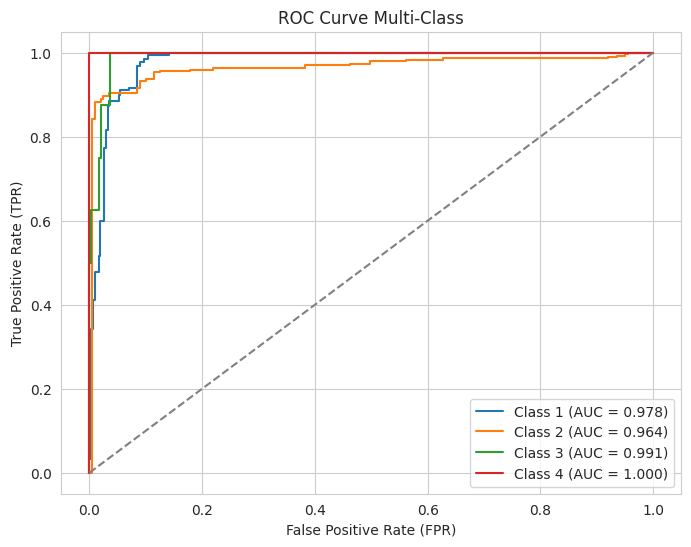

In [11]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import classification_report

# Melakukan prediksi probabilitas untuk setiap kelas
y_pred_proba = model.predict_proba(X_test)
y_pred = model.predict(X_test)

# Binarisasi target untuk multi-class ROC
classes = np.unique(y_test)
y_test_binarized = label_binarize(y_test, classes=classes)

# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision_macro = precision_score(y_test, y_pred, average="macro")
recall_macro = recall_score(y_test, y_pred, average="macro")
f1_macro = f1_score(y_test, y_pred, average="macro")
auc_multi = roc_auc_score(y_test_binarized, y_pred_proba, multi_class='ovo')

# Menampilkan hasil evaluasi
print(f"Akurasi: {accuracy:.3f}")
print(f"Presisi (Macro): {precision_macro:.3f}")
print(f"Recall (Macro): {recall_macro:.3f}")
print(f"F1-Score (Macro): {f1_macro:.3f}")
print(f"AUC Multi-Class: {auc_multi:.3f}")

# Menampilkan laporan klasifikasi lengkap
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))

# Plot ROC Curve untuk setiap kelas
plt.figure(figsize=(8, 6))
for i in range(len(classes)):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    plt.plot(fpr, tpr, label=f"Class {classes[i]} (AUC = {roc_auc_score(y_test_binarized[:, i], y_pred_proba[:, i]):.3f})")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve Multi-Class")
plt.legend()
plt.show()
